# SPARSE application sandbox

This notebook contains an application of the SPARSE module to a relatively simple system of two coupled potentials.

# Introduction

### Import

It is preferable to load the module via an import statement.
Running the file sparse.py in an open IPython console also works, but will disable some multiprocessing features.

In [1]:
from sparse import *

Note that loading sparse with a star import also imports NumPy as **np** and Pandas as **pd**.

In [2]:
from utils import poles, amplitudes, composition

The utils module contains useful functions to analyze the results of the SPARSE algorithm:

**poles** calculates the scattering poles by extrapolating an input *K*-matrix to complex energies.

**amplitudes** calculates the scattering amplitudes for real energies from an input *K*-matrix.

**composition** calculates the probabilities of a bound state from an input reduced radial wave function.

### Setup

The potential metadata is loaded from a csv file and stored in a global Pandas DataFrame called **channels**. Let us have a look at the channels in this example:

In [3]:
channels

,channel,l,threshold,mu
1,Potential well P-wave,1,0.0,1000.0
2,Linear potential S-wave,0,inf,500.0


The potential itself is loaded from another csv file and stored in a global Pandas DataFrame called **potential**. Observe that each row of the DataFrame contains the flattened potential matrix at a given position.

In [4]:
potential.head()

row                1                   2          
column             1         2         1         2
0.00001  4900.045100  0.000025  0.000025  0.050000
0.00002  2400.015400  0.000100  0.000100  0.099999
0.00003  1566.669234  0.000225  0.000225  0.149999
0.00004  1149.994100  0.000400  0.000400  0.199998
0.00005   899.987500  0.000625  0.000625  0.249998

Let us plot the potential and observe that indeed the first diagonal element is a potential well, and the second diagonal element is a linear potential. Note also the coupling potential in the diagonal.

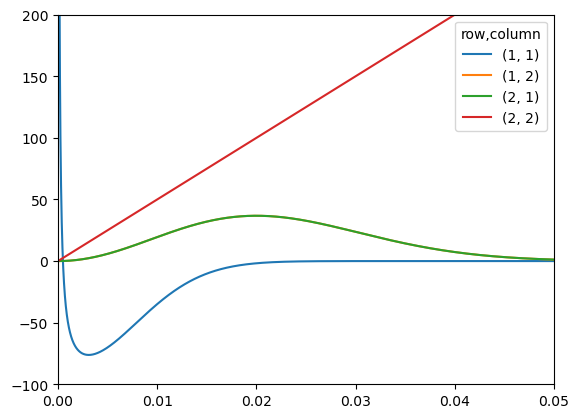

In [5]:
potential.plot(xlim=(0,0.05), ylim=(-100,200));

## Application

### Bound states

The SPARSE module is primarily designed for scattering states, but it also contains a handy bound state solver. Let us calculate the bound state energies and reduced radial wave functions in this potential matrix:

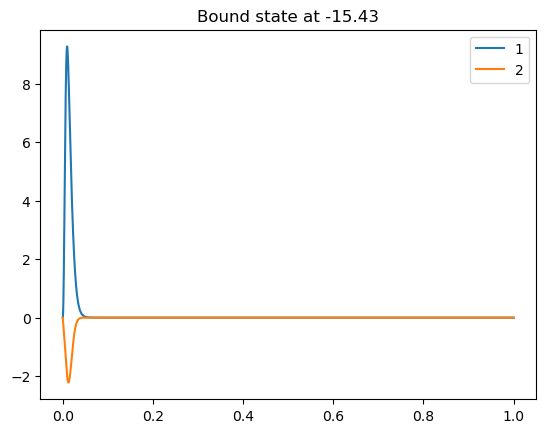

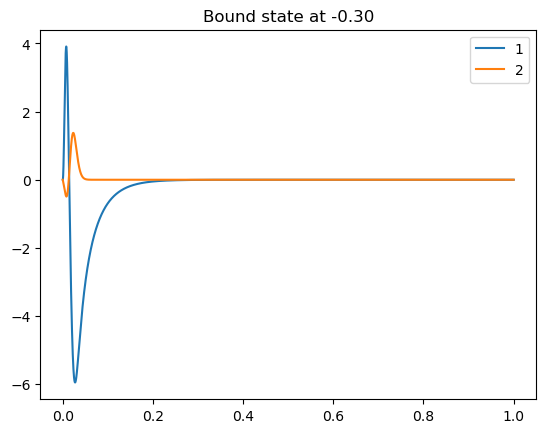

In [6]:
masses, reduced_radial_wave_functions = bound_states(2, -100)
for i, psi in enumerate(reduced_radial_wave_functions):
    psi.plot(title=f'Bound state at {masses[i]:.2f}')

Note the mixture between the two channels because of the couplings. Let us calculate the probabilities:

In [7]:
for i, psi in enumerate(reduced_radial_wave_functions):
    print(f'Probabilities for bound state at {masses[i]:.2f}')
    print(composition(psi))

Probabilities for bound state at -15.43
1    0.940995
2    0.059005
dtype: float64
Probabilities for bound state at -0.30
1    0.976356
2    0.023644
dtype: float64


## *K*-matrix

For a less trivial application, let us now calculate the *K*-matrix for energies above the threshold at 0.
Note that the number of parallel processes should never exceed the cpu count of your machine.

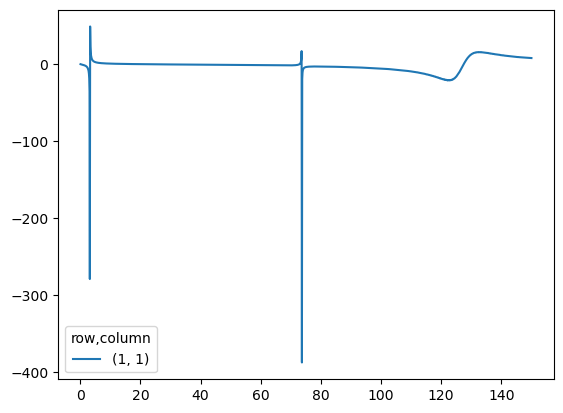

In [8]:
energies = np.linspace(0,150,1501)
kmat = k_matrices(energies, processes=12)
kmat.plot();

The *K*-matrix completely determines the scattering problem. Let us use the amplitude function of the utils module to calculate the scattering amplitudes:

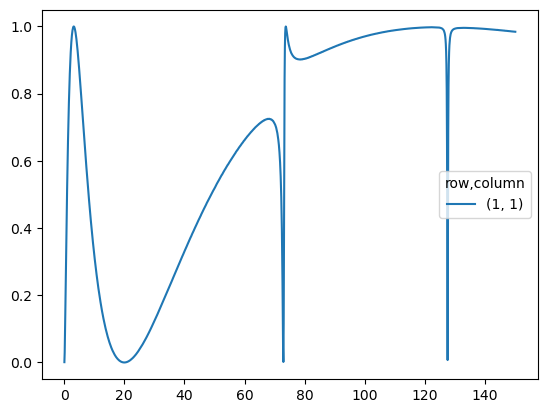

In [9]:
amps = amplitudes(kmat)
np.square(abs(amps)).plot();

Seems complicated! This behavior is expected because there are multiple bound states near threshold, as we have seen before. We can establish the pole structure of the scattering amplitudes for energies close to the physical real axis using the poles function from the utils module:

In [10]:
poles(kmat)

array([  1.42158174 +3.33544707j,  51.19724785+35.06753592j,
        72.92356254 -0.52148527j, 127.4998964  -0.14149615j])

This shows that the complicated scattering amplitude is the interplay of 4 poles: 2 on the physical Riemann sheet and 2 on the closest unphysical Riemann sheet. The 2 poles on the physical sheet arise because of the near-threshold bound states. The 2 poles on the unphysical sheet are resonances that arise from the coupling of bound states in the linear potential with the scattering states in the potential well.